In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
# Split the dataset into features and target
X = iris_dataset['data']
y = iris_dataset['target']

In [12]:
# --- Preprocessing: Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# --- Cross-Validation and Model Evaluation ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [14]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(random_state=0)
}

In [15]:
# Evaluate models with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

KNN Accuracy: 0.96 (+/- 0.02)
SVM Accuracy: 0.95 (+/- 0.02)
RandomForest Accuracy: 0.93 (+/- 0.03)


In [16]:
# --- Grid Search for Hyperparameter Tuning ---
param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

In [17]:
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=kf, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for KNN: {'n_neighbors': 5}
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 50}


In [18]:
# --- Final Evaluation on Test Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Test Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


KNN Test Accuracy: 1.00
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM Test Accuracy: 1.00
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


RandomForest Test Accuracy: 0.9

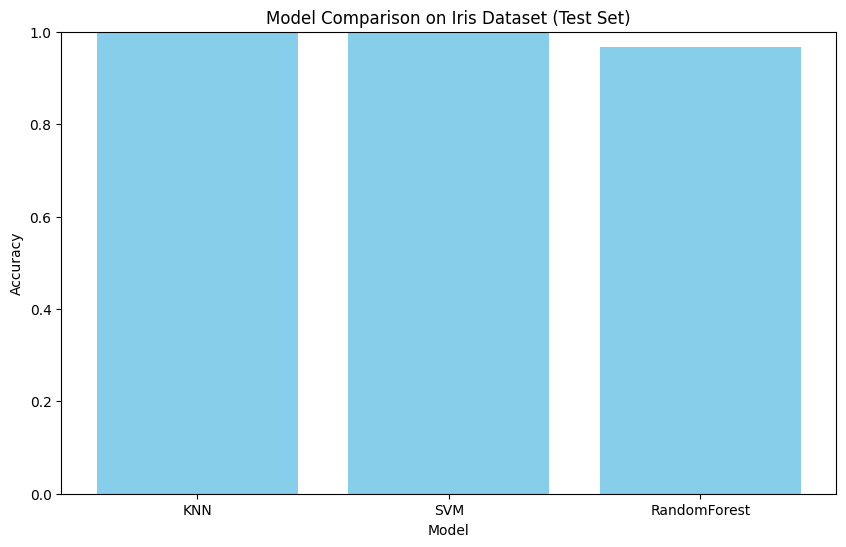

In [19]:
# --- Visualize Model Comparison ---
accuracies = [accuracy_score(y_test, best_models[name].predict(X_test)) for name in best_models]
plt.figure(figsize=(10, 6))
plt.bar(best_models.keys(), accuracies, color='skyblue')
plt.title('Model Comparison on Iris Dataset (Test Set)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()